In [1]:
import numpy as np
import math, random

from math import sqrt, cos, sin, pi, atan2, degrees
from numpy import abs

import matplotlib.pyplot as plt

from typing import List, Tuple

from shapely import affinity, distance
from shapely.geometry import Polygon, Point, LinearRing, LineString
from shapely.plotting import plot_polygon, plot_points, plot_line
from shapely.ops import transform

Creating polygon

Model 5-2

In [2]:
vertices = [(4.0, 0.0), (0.0, 4.0), (-4.0, 0.0), (0.0, -4.0), (4.0, 0.0)]
r, rc, R = 4.0, 4.0/sqrt(2), 1.0
pplg = LinearRing(vertices)

delta = 0.4
steps = int((r-rc)/delta)

Solution

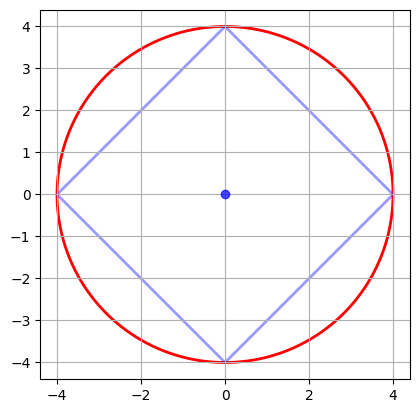

In [4]:
opts = []
n = 10000

ppts = []
ppts.append(Point(pplg.coords[0][0], pplg.coords[0][1]))
for i in reversed(range(len(pplg.coords)-1)):
    ppts.append(Point(pplg.coords[i][0], pplg.coords[i][1]))
cplg = LinearRing(ppts)

for i in range(n):
    phi = (i / n)*2.0*pi
    opts.append(Point(r*cos(phi), r*sin(phi)))
oplg = LinearRing(opts)

# plot_line(oplg, add_points=False, color=(1,0,0), alpha=1)
# plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
# plot_line(cplg, add_points=False, color=(0,0,1), alpha=0.4)

# plt.autoscale()
# plt.show()

In [5]:
def crcl(pt1, pt2, pt3):
   z1 = complex(pt1.x, pt1.y)
   z2 = complex(pt2.x, pt2.y)
   z3 = complex(pt3.x, pt3.y)
   """
   Return (center, radius), with complex center, of the circle through
   complex z1, z2, z3. If z1, z2, z3 are colinear, print "colinear" and
   return None.
   """
   if z1 == z2:
      print("colinear")
      return None

   def f(z):
      return (z-z1)/(z2-z1)

   def f_inv(w):
      return z1+(z2-z1)*w

   w3 = f(z3)
   if w3.imag == 0: #may want abs(w3.imag) < eps
      print("colinear")
      return None
   
   d = (w3-w3*w3.conjugate())/(w3-w3.conjugate())
   c = f_inv(d)
   pt = Point(c.real, c.imag)
   r = abs(z1-c)
   return pt, r

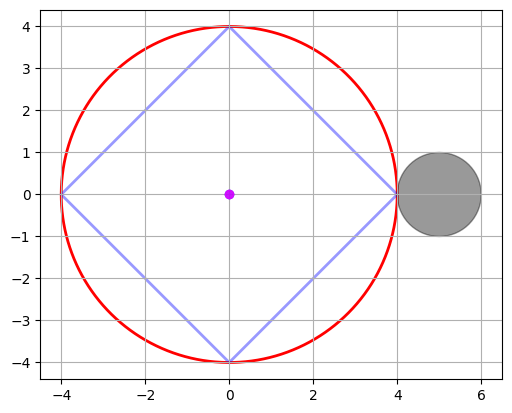

In [6]:
x0, y0, angle = 0.0, 0.0, 0.0
cplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), oplg), angle, origin = (-x0, -y0))
oplgmod = affinity.rotate(transform(lambda x, y, z=None: (x-x0, y-y0), cplg), angle, origin = (-x0, -y0))
circle = Point(oplgmod.bounds[2]+R, 0.0).buffer(R)

plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplgmod, add_points=False, color=(0,0,1), alpha=0.4)
plot_polygon(circle, add_points=False, color=(0,0,0), alpha=0.4)

plt.autoscale()
plt.show()

In [7]:
n = 10000

cpts = []
opts = []
ang = []

maxdst = 0.0
maxi = 0
for i in range(n):
    phi = (i / n)*2.0*pi
    ln = LineString([(x0, y0), (2*r*cos(phi), 2*r*sin(phi))])
    cpt = cplg.intersection(ln)
    opt = oplg.intersection(ln)
    dst = sqrt((opt.x-cpt.x)**2+(opt.y-cpt.y)**2)
    if dst > maxdst:
        maxdst = dst
        maxi = i
    cpts.append(cpt)
    opts.append(opt)
    ang.append(phi)

In [8]:
plgs = []
ptss = []
trcplgs = []
trcptss = []

lpts = []
for i in range(9):
    lpts.append(opts[int(n*i/8)-1])

for j in range(steps+1):
    if j < steps+1:
        pt = []
        trcpt = []

        rad = sqrt(lpts[1].x**2+lpts[1].y**2)
        ratio = 1.0-delta*(j+1)/rad
        center, radius = crcl(Point(lpts[0].x, lpts[0].y), Point(lpts[1].x*ratio, lpts[1].y*ratio), Point(lpts[2].x, lpts[2].y))

        ang1 = atan2(lpts[0].y-center.y, lpts[0].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        ang2 = atan2(lpts[2].y-center.y, lpts[2].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        if ang1 < 0:
            ang1 += 2*pi
        if ang2 < 0:
            ang2 += 2*pi

        for i in range(int(n/4)):
            alpha = i / int(n/4)
            phi = (1.0-alpha)*ang1+alpha*ang2
            x = center.x+radius*cos(phi)
            y = center.y+radius*sin(phi)
            pt.append(Point(x, y))
            trcpt.append(Point(x+R*cos(ang[i]), y+R*sin(ang[i])))

        center, radius = crcl(Point(lpts[2].x, lpts[2].y), Point(lpts[3].x*ratio, lpts[3].y*ratio), Point(lpts[4].x, lpts[4].y))

        ang1 = atan2(lpts[2].y-center.y, lpts[2].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        ang2 = atan2(lpts[4].y-center.y, lpts[4].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        if ang1 < 0:
            ang1 += 2*pi
        if ang2 < 0:
            ang2 += 2*pi

        for i in range(int(n/4), int(n/2)):
            alpha = (i-int(n/4)) / int(n/4)
            phi = (1.0-alpha)*ang1+alpha*ang2
            x = center.x+radius*cos(phi)
            y = center.y+radius*sin(phi)
            pt.append(Point(x, y))
            trcpt.append(Point(x+R*cos(ang[i]), y+R*sin(ang[i])))

        center, radius = crcl(Point(lpts[4].x, lpts[4].y), Point(lpts[5].x*ratio, lpts[5].y*ratio), Point(lpts[6].x, lpts[6].y))

        ang1 = atan2(lpts[4].y-center.y, lpts[4].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        ang2 = atan2(lpts[6].y-center.y, lpts[6].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        if ang1 < 0:
            ang1 += 2*pi
        if ang2 < 0:
            ang2 += 2*pi

        for i in range(int(n/2), int(3*n/4)):
            alpha = (i-int(n/2)) / int(n/4)
            phi = (1.0-alpha)*ang1+alpha*ang2
            x = center.x+radius*cos(phi)
            y = center.y+radius*sin(phi)
            pt.append(Point(x, y))
            trcpt.append(Point(x+R*cos(ang[i]), y+R*sin(ang[i])))

        center, radius = crcl(Point(lpts[6].x, lpts[6].y), Point(lpts[7].x*ratio, lpts[7].y*ratio), Point(lpts[8].x, lpts[8].y))

        ang1 = atan2(lpts[6].y-center.y, lpts[6].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        ang2 = atan2(lpts[8].y-center.y, lpts[8].x-center.x) - atan2(center.y-center.y, center.x-center.x)
        if ang1 < 0:
            ang1 += 2*pi
        if ang2 < 0:
            ang2 += 2*pi

        for i in range(int(3*n/4), n):
            alpha = (i-int(3*n/4)) / int(n/4)
            phi = (1.0-alpha)*ang1+alpha*ang2
            x = center.x+radius*cos(phi)
            y = center.y+radius*sin(phi)
            pt.append(Point(x, y))
            trcpt.append(Point(x+R*cos(ang[i]), y+R*sin(ang[i])))

        ptss.append(pt)
        plgs.append(LinearRing(pt))
        trcptss.append(trcpt)
        trcplgs.append(LinearRing(trcpt))
    else:
        pt = []
        trcpt = []
        for i in range(len(ang)):
            pt.append(cpts[i])
            trcpt.append(Point(cpts[i].x+R*cos(ang[i]), cpts[i].y+R*sin(ang[i])))
        ptss.append(pt)
        plgs.append(LinearRing(pt))
        trcptss.append(trcpt)
        trcplgs.append(LinearRing(trcpt))
    

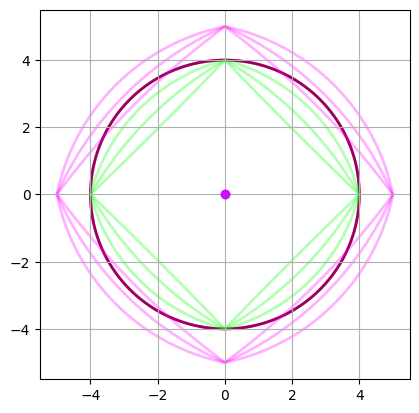

In [9]:
plot_line(cplgmod, add_points=False, color=(1,0,0), alpha=1)
plot_points(Point(0.0, 0.0), color=(0,0,1), alpha=0.7)
plot_points(Point(-x0, -y0), color=(1,0,1), alpha=0.7)
plot_line(oplg, add_points=False, color=(0,0,1), alpha=0.4)
# plot_line(cplg, add_points=False, color=(1,0,1), alpha=0.7)
for j in range(steps+1):
    plot_line(plgs[j], add_points=False, color=(0,1,0), alpha=0.3)
for j in range(steps+1):
    plot_line(trcplgs[j], add_points=False, color=(1,0,1), alpha=0.3)

plt.show()

In [10]:
ln = LineString([(0.0, 0.0), (100.0, 0.0)])
x = []
y = []
dst = []
n = 1000

dst.append(0.0)
for j in range(steps+1):
    pt1 = affinity.rotate(trcplgs[j], 0.0, origin=Point(0.0,0.0)).intersection(ln)
    for i in range(1, n):
        angle = i*360.0/n+360.0*j
        pt2 = affinity.rotate(trcplgs[j], angle, origin=Point(0.0,0.0)).intersection(ln)
        x.append(angle)
        y.append(pt2.x)
        dst.append(dst[-1]+sqrt((pt2.x-pt1.x)**2+(pt2.y-pt1.y)**2))
        pt1 = pt2

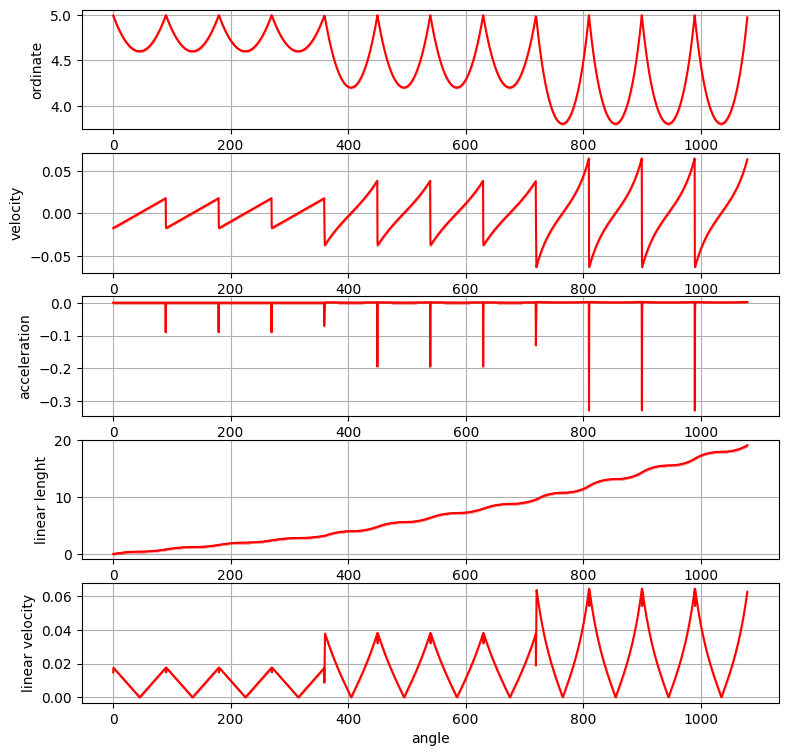

In [11]:
d1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, y[1:], y)]
d2 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, d1[1:], d1)]
dst1 = [(y2-y0)/(x2-x0) for x2, x0, y2, y0 in zip(x[1:], x, dst[1:], dst)]

fig, axs = plt.subplots(5, 1)
fig.set_size_inches(9.0, 9.0)

axs[0].plot(x, y, marker='.', color="red", markersize=0.1)
axs[0].set_ylabel('ordinate')
axs[0].grid(True)

axs[1].plot(x[:-1], d1, marker='.', color="red", markersize=0.1)
axs[1].set_ylabel('velocity')
axs[1].grid(True)

axs[2].plot(x[:-2], d2, marker='.', color="red", markersize=0.1)
axs[2].set_ylabel('acceleration')
axs[2].grid(True)

axs[3].plot(x, dst[:-1], marker='.', color="red", markersize=0.1)
axs[3].set_ylabel('linear lenght')
axs[3].grid(True)

axs[4].plot(x[:-1], dst1, marker='.', color="red", markersize=0.1)
axs[4].set_xlabel('angle')
axs[4].set_ylabel('linear velocity')
axs[4].grid(True)

plt.show()